CID: C2072009


# **Question 1: Load**




*   Programmatically download and load into your favorite analytical tool the transactions data. This data, which is in line-delimited JSON format, can be found here

*   Please describe the structure of the data. Number of records and fields in each record?

*  Please provide some additional basic summary statistics for each field. Be sure to include a count of null, minimum, maximum, and unique values where appropriate.

In [ ]:
import os
import numpy as np
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests
import urllib3
import zipfile

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Tried loading from the website directly, there was some issue
# Got https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
# http = urllib3.PoolManager()
# req = http.request("GET", "https://github.com/CapitalOneRecruiting/DS/blob/173ca4399629f1e4e74146107eb9bef1e7009741/transactions.zip", preload_content=False)

# with open("transactions.zip", 'wb') as out:
#   while True:
#     data = req.read(4096)
#     if not data:
#       break
#     out.write(data)
# req.release_conn()

# zFile = zipfile.ZipFile("transactions.zip", "r")
# zFile.extract(zFile)

# # To check if the file is loaded
# !ls transactions/

##### Tried other approach to scrape the data, seems like there I could not find the data to read
# url_content = requests.get(url).text            # Downloading content from webpage
# soup = BeautifulSoup(url_content,'html.parser') # Creating beautifulsoup object

# Sometimes we might have more than one table and the table might not have labels but instead classes, this is a quick check to figure out if we have labels or not.
# for table in soup.find_all('table'):
#     print(table.get('class'))
## We have only one table and we have row labels in order

# # Get all tables, store as list
# tables = soup.find_all('table')
# table = tables[0] # Get the first table

# # Dummy List's to store rows and columns 
# row_data = []
# headers_data = []

# # To collect column headers we need to find all tags with <TH> tags
# for column in table.findAll('th'):
#     headers_data.append(column.text)
# print(headers_data)

# # To collect all the rows and columns from the table
# rows = table.find_all('tr')
# temp_col = table.findAll('th')

# for row in rows:
#     singlerow = {}
#     for td, th in zip(row.findAll("td"), headers_data) :
#         singlerow[th] = td.text
#     row_data.append(singlerow)
 
# with open('ufos_in_texas.csv', 'w') as file:
#     writer = csv.DictWriter(file, fieldnames = headers_data)
#     writer.writeheader()
#     for row in row_data:
#       if row:
#         writer.writerow(row)



Cloned the git repository then unzipped the files manually. Then copied the transactions.txt file on to the drive. Mounted the drive to proceed forward.


> If given more time would possibly explore ways to download files from github programmaitcally. 



In [ ]:
# Loading data
data = pd.read_json("/content/drive/MyDrive/DataScience/transactions.txt", lines=True)
# print("Time required to parse data :",time.process_time())

# To check the loaded data
data.head() # Top 5 Rows
# data.info() # Gives information
# data.tail() # Last % Rows

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,02,01,rideshare,06/2023,2015-03-14,2015-03-14,414,414,1803,PURCHASE,,0.0,,,,False,,,False,False
1,737265056,737265056,5000,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,01,entertainment,02/2024,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.0,,,,True,,,False,False
2,737265056,737265056,5000,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.0,,,,False,,,False,False
3,737265056,737265056,5000,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.0,,,,False,,,False,False
4,830329091,830329091,5000,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,01,fastfood,10/2029,2015-08-06,2015-08-06,885,885,3143,PURCHASE,,0.0,,,,True,,,False,False


In [ ]:
# Simple summary statistics and checks for nulls. In case there are any missing entries we can come up strategies like data augmentation (filling with mean/median) or remove some data.
print("Number of entries in dataset :",len(data))
print("Number of columns in dataset :",len(data.columns))
print("Number of datapoints in dataset :",data.count().sum())
print("Number of null values in dataset :",data.isnull().sum())

Number of entries in dataset : 786363
Number of columns in dataset : 29
Number of datapoints in dataset : 22804527
Number of null values in dataset : accountNumber               0
customerId                  0
creditLimit                 0
availableMoney              0
transactionDateTime         0
transactionAmount           0
merchantName                0
acqCountry                  0
merchantCountryCode         0
posEntryMode                0
posConditionCode            0
merchantCategoryCode        0
currentExpDate              0
accountOpenDate             0
dateOfLastAddressChange     0
cardCVV                     0
enteredCVV                  0
cardLast4Digits             0
transactionType             0
echoBuffer                  0
currentBalance              0
merchantCity                0
merchantState               0
merchantZip                 0
cardPresent                 0
posOnPremises               0
recurringAuthInd            0
expirationDateKeyInMatch    0
isFraud   

In [ ]:
# To get the maximum and minimum of each column
# data.max()
# data.min()
# data.isnull().sum()
# To get a summary of all data
data.describe()

,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,cardCVV,enteredCVV,cardLast4Digits,currentBalance
count,7.863630e+05,7.863630e+05,786363.000000,786363.000000,786363.000000,786363.000000,786363.000000,786363.000000,786363.000000
mean,5.372326e+08,5.372326e+08,10759.464459,6250.725369,136.985791,544.467338,544.183857,4757.417799,4508.739089
std,2.554211e+08,2.554211e+08,11636.174890,8880.783989,147.725569,261.524220,261.551254,2996.583810,6457.442068
min,1.000881e+08,1.000881e+08,250.000000,-1005.630000,0.000000,100.000000,0.000000,0.000000,0.000000
25%,3.301333e+08,3.301333e+08,5000.000000,1077.420000,33.650000,310.000000,310.000000,2178.000000,689.910000
50%,5.074561e+08,5.074561e+08,7500.000000,3184.860000,87.900000,535.000000,535.000000,4733.000000,2451.760000
75%,7.676200e+08,7.676200e+08,15000.000000,7500.000000,191.480000,785.000000,785.000000,7338.000000,5291.095000
max,9.993896e+08,9.993896e+08,50000.000000,50000.000000,2011.540000,998.000000,998.000000,9998.000000,47498.810000


# Question 2: Plot

1.   Plot a histogram of the processed amounts of each transaction, the transactionAmount column.
2.   Report any structure you find and any hypotheses you have about that structure

In [ ]:
# # Drop unused columns
# data.drop(['merchantState',	'merchantZip', 'echoBuffer', 'posOnPremises','recurringAuthInd' ],axis = 1 , inplace = True)
data.to_csv('/content/drive/MyDrive/cleanedTransactiondata.csv')


<Figure size 432x288 with 0 Axes>

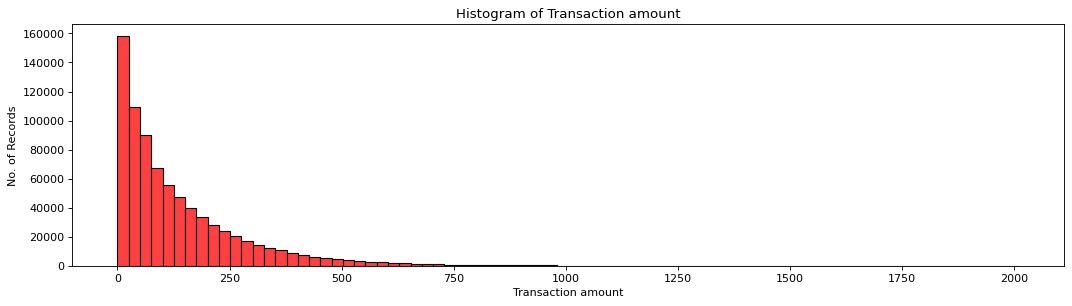

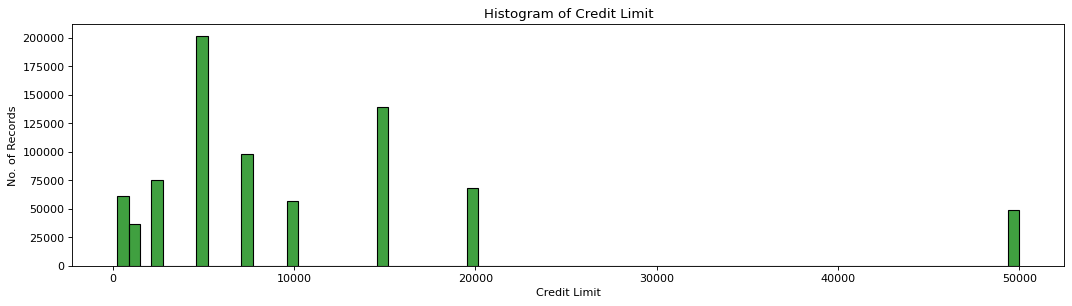

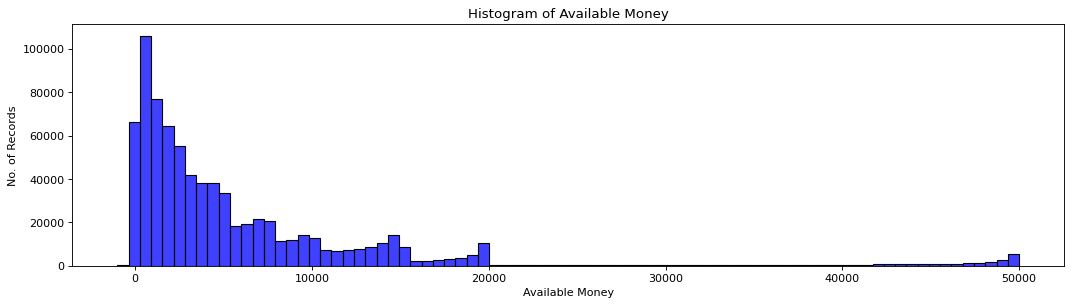

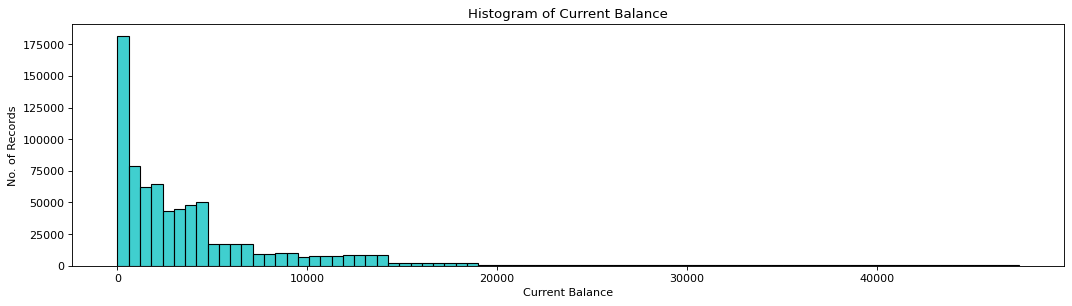

In [ ]:
plt.suptitle('Statistical Data Distribution')

plt.suptitle('Numerical Data Distribution')
Balances = ['transactionAmount','creditLimit','availableMoney','currentBalance']
x_labels = ['Transaction amount','Credit Limit','Available Money','Current Balance', ]
colors = ['r', 'g', 'b', 'c']

for i in range(0,len(Balances)):
    
    plt.figure(figsize=(16,4), dpi= 80)
    sns.histplot(data[Balances[i]],color = colors[i], bins =80)
    # sns.boxplot(data[Balances[i]],color = colors[i], orient = 'Vertical')
    plt.xlabel(x_labels[i])
    plt.ylabel('No. of Records')
    plt.title('Histogram of ' + x_labels[i])

In [ ]:
from enum import unique
cl = data['creditLimit'].unique()
cl.sort()
l = []; s =[]
for i in range(len(cl)):
  if i==0:
    df =  data.loc[data['creditLimit']<cl[i]+1]
    print("Number of accounts with credit Limit  " + str(cl[i])+ " are  " +str(count(df['accountNumber'].unique())))
  else:    
    df =  data.loc[(data['creditLimit']<cl[i]+1)& (data['creditLimit']>cl[i-1]+1)]
    l.append(count(df['accountNumber'].unique()))
    print("Number of accounts with credit Limit  " + str(cl[i])+ " are  " +str(count(df['accountNumber'].unique())))

Number of accounts with credit Limit  250 are  265
Number of accounts with credit Limit  500 are  234
Number of accounts with credit Limit  1000 are  240
Number of accounts with credit Limit  2500 are  499
Number of accounts with credit Limit  5000 are  1031
Number of accounts with credit Limit  7500 are  750
Number of accounts with credit Limit  10000 are  484
Number of accounts with credit Limit  15000 are  773
Number of accounts with credit Limit  20000 are  478
Number of accounts with credit Limit  50000 are  246


In [ ]:
cl

array([  250,   500,  1000,  2500,  5000,  7500, 10000, 15000, 20000,
       50000])

In [ ]:
# Lets check the transactions and net value
import math
n =[]; s =[]
for i in range(len(cl)):
  if i==0:
    df =  data.loc[data['creditLimit']<cl[i]+1]
  else:    
    df =  data.loc[(data['creditLimit']<cl[i]+1)& (data['creditLimit']>cl[i-1]+1)]
    #l.append(count(df['accountNumber'].unique()))
  n1 = count(df['transactionAmount']); n.append(n1)
  s1 = math.floor(sum(df['transactionAmount'])); s.append(s1)
  print(str(cl[i])+" #Transactions are " +str(n1)+ ". And $ value is " + str(s1) + " Per transaction amount of spending is "+ str(math.floor(s1/n1)))


250 #Transactions are 34025. And $ value is 4625417 Per transaction amount of spending is 135
500 #Transactions are 27097. And $ value is 3613655 Per transaction amount of spending is 133
1000 #Transactions are 36430. And $ value is 4970575 Per transaction amount of spending is 136
2500 #Transactions are 75429. And $ value is 10284144 Per transaction amount of spending is 136
5000 #Transactions are 201863. And $ value is 27963035 Per transaction amount of spending is 138
7500 #Transactions are 97913. And $ value is 13130340 Per transaction amount of spending is 134
10000 #Transactions are 56889. And $ value is 7618742 Per transaction amount of spending is 133
15000 #Transactions are 139307. And $ value is 19331882 Per transaction amount of spending is 138
20000 #Transactions are 68629. And $ value is 9356052 Per transaction amount of spending is 136
50000 #Transactions are 48781. And $ value is 6826710 Per transaction amount of spending is 139


In [ ]:
print(min(s))
print(max(s))

3613655
27963035


Text(0, 0.5, 'Transaction Amount')

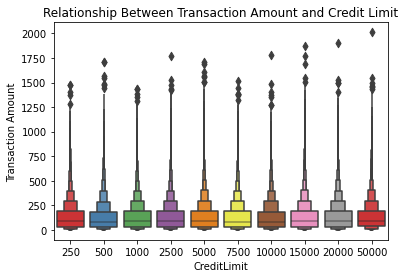

In [ ]:
# Transaction amount vs credit Limit
plt.figure()
sns.boxenplot(data=data, x='creditLimit', y='transactionAmount', palette='Set1')
plt.title('Relationship Between Transaction Amount and Credit Limit')
plt.xlabel('CreditLimit')
plt.ylabel('Transaction Amount')

## **Observations**


**Transaction Amount**

* There are many transactions with credit card with 0$ transaction amount. These maybe to very the cardholder or to authenticate. Most (Almost all) of them happended without card present. 

* Analysis indicates that average money spent on transaction in each band and total is low (around $135).

* This indicates that most people are making small purchases frequently. Almost all transactions were less than $500.

* Most money spent is from the band with credit limit $5000. This maybe due to highest number of transactions from this band.


**Credit Limit**

* There is a range of credit limit 0 - $50,000. They are 250,   500,  1000,  2500,  5000,  7500, 10000, 15000, 20000, 50000.

* Looks like highest number of people have $1000 as the credit limit.

* There are very few people with credit limit > $20,000 as expected.


**Available Money**

* It tells us about the money which is available to spent with respect to Credit Limit. There are some -ve values which tells us that some people went over board.

* Among the people with -ve available money, many are from 250 dollars credit limit, followed by 500 then 1000.  This may indicate that they spend more and might be considered for increase in credit limit. [If this is due to one big purchse like a laptop which is not frequent then they dont need increase in credit limit.]


# Question 3:Data Wrangling - Duplicate Transactions

You will notice a number of what look like duplicated transactions in the data set. One type of duplicated transaction is a reversed transaction, where a purchase is followed by a reversal. Another example is a multi-swipe, where a vendor accidentally charges a customer's card multiple times within a short time span.

1.   Can you programmatically identify reversed and multi-swipe transactions?
2.   What total number of transactions and total dollar amount do you estimate for the reversed transactions? For the multi-swipe transactions? (please consider the first transaction to be "normal" and exclude it from the number of transaction and dollar amount counts)
3. Did you find anything interesting about either kind of transaction?




In [ ]:
# There are a number of transactions which looked like duplicated transactions in the dataset. Using the function duplicated we can identify all the transactions which have same transaction amount.
# If they appear in short span then they are multi-swipe transactions. 
data_rev = data[data['transactionType']=="REVERSAL"]
data_pur = data[data['transactionType']=="PURCHASE"]
#data_rev = data.loc[data['transactionType']="REVERSAL"]

In [ ]:
temp1 = data[data.duplicated(subset = {'transactionAmount'})==True]
temp1
# We see lot of duplicates - this maybe due to repeat purchases, we cant term of all them as duplicates.

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud,Date,Time
3,737265056,737265056,5000,5000.00,2016-12-10T02:14:50,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.00,,,,False,,,False,False,2016-12-10,02:14:50
12,830329091,830329091,5000,4959.25,2016-12-14T10:00:35,40.75,GreenCook,US,US,09,01,food_delivery,08/2024,2015-08-06,2015-08-06,885,885,3143,PURCHASE,,40.75,,,,False,,,False,False,2016-12-14,10:00:35
13,830329091,830329091,5000,4918.50,2016-12-20T18:38:23,40.75,GreenCook,US,US,09,01,food_delivery,08/2024,2015-08-06,2015-08-06,885,885,3143,PURCHASE,,81.50,,,,False,,,False,False,2016-12-20,18:38:23
14,830329091,830329091,5000,4877.75,2016-12-28T06:43:01,40.75,GreenCook,US,US,09,01,food_delivery,08/2024,2015-08-06,2015-08-06,885,885,3143,PURCHASE,,122.25,,,,False,,,False,False,2016-12-28,06:43:01
39,574788567,574788567,2500,2200.98,2016-05-24T01:38:03,215.13,Convenient Tire,US,US,09,01,auto,10/2021,2015-10-13,2015-10-13,206,206,8522,REVERSAL,,299.02,,,,True,,,False,False,2016-05-24,01:38:03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786358,732852505,732852505,50000,48904.96,2016-12-22T18:44:12,119.92,Lyft,US,US,90,01,rideshare,12/2022,2012-08-23,2012-08-23,936,936,3783,PURCHASE,,1095.04,,,,False,,,False,False,2016-12-22,18:44:12
786359,732852505,732852505,50000,48785.04,2016-12-25T16:20:34,18.89,hulu.com,US,US,09,01,online_subscriptions,08/2023,2012-08-23,2012-08-23,939,939,3388,PURCHASE,,1214.96,,,,False,,,False,False,2016-12-25,16:20:34
786360,732852505,732852505,50000,48766.15,2016-12-27T15:46:24,49.43,Lyft,US,US,02,01,rideshare,08/2025,2012-08-23,2012-08-23,936,936,3783,PURCHASE,,1233.85,,,,False,,,False,False,2016-12-27,15:46:24
786361,732852505,732852505,50000,48716.72,2016-12-29T00:30:55,49.89,walmart.com,US,US,09,99,online_retail,07/2022,2012-08-23,2012-08-23,939,939,3388,PURCHASE,,1283.28,,,,False,,,False,False,2016-12-29,00:30:55


In [ ]:
# We need to take advantage of the fact that multi-swipe happen in very short duration of time. To identify them we need to conver the time into usable format.
#data['Time'] = datetime.strptime(data['time'].replace('T', ' ')).date()
data['Date'] = data['transactionDateTime'].apply(lambda x: datetime.strptime(x.replace('T', ' '), '%Y-%m-%d %H:%M:%S').date())
data['Time'] = data['transactionDateTime'].apply(lambda x: datetime.strptime(x.replace('T', ' '), '%Y-%m-%d %H:%M:%S').time())


In [ ]:
data.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud,Date,Time
0,737265056,737265056,5000,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,02,01,rideshare,06/2023,2015-03-14,2015-03-14,414,414,1803,PURCHASE,,0.0,,,,False,,,False,False,2016-08-13,14:27:32
1,737265056,737265056,5000,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,01,entertainment,02/2024,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.0,,,,True,,,False,False,2016-10-11,05:05:54
2,737265056,737265056,5000,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.0,,,,False,,,False,False,2016-11-08,09:18:39
3,737265056,737265056,5000,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.0,,,,False,,,False,False,2016-12-10,02:14:50
4,830329091,830329091,5000,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,01,fastfood,10/2029,2015-08-06,2015-08-06,885,885,3143,PURCHASE,,0.0,,,,True,,,False,False,2016-03-24,21:04:46


In [ ]:
# Can we find duplicates that happened on same day - these can be multiple purchases or multi-swipe
temp = data[data.duplicated(subset = {'transactionAmount', 'Date'})==True]
# Using .duplicated(keep = False) - will remove all the duplicates in the data.
# We can get first occurance of duplicate and last occurance of duplicates using them we can figure out multi-swipe and reversal transactions

In [ ]:
temp

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud,Date,Time
39,574788567,574788567,2500,2200.98,2016-05-24T01:38:03,215.13,Convenient Tire,US,US,09,01,auto,10/2021,2015-10-13,2015-10-13,206,206,8522,REVERSAL,,299.02,,,,True,,,False,False,2016-05-24,01:38:03
133,984504651,984504651,50000,46367.41,2016-01-16T09:53:15,450.74,Planet Fitness #849960,US,US,05,01,health,08/2028,2015-07-27,2015-07-27,640,640,8332,REVERSAL,,3632.59,,,,False,,,False,False,2016-01-16,09:53:15
200,984504651,984504651,50000,36452.49,2016-02-12T05:10:49,34.92,Golds Gym #747443,US,US,09,01,health,03/2028,2015-07-27,2015-07-27,640,640,8332,REVERSAL,,13547.51,,,,False,,,False,False,2016-02-12,05:10:49
263,984504651,984504651,50000,26680.99,2016-03-12T06:34:29,118.52,AMC #706324,US,US,02,01,entertainment,10/2024,2015-07-27,2015-07-27,640,640,8332,PURCHASE,,23319.01,,,,True,,,False,False,2016-03-12,06:34:29
264,984504651,984504651,50000,26562.47,2016-03-12T06:36:41,118.52,AMC #706324,US,US,02,01,entertainment,10/2024,2015-07-27,2015-07-27,640,640,8332,PURCHASE,,23437.53,,,,True,,,False,False,2016-03-12,06:36:41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786270,732852505,732852505,50000,48811.18,2016-02-26T19:30:27,0.00,Lyft,US,US,05,01,rideshare,04/2029,2012-08-23,2012-08-23,939,939,3388,ADDRESS_VERIFICATION,,1188.82,,,,False,,,False,False,2016-02-26,19:30:27
786286,732852505,732852505,50000,49971.30,2016-05-03T03:15:51,19.79,Uber,US,US,05,01,rideshare,04/2026,2012-08-23,2012-08-23,939,939,3388,PURCHASE,,28.70,,,,False,,,False,False,2016-05-03,03:15:51
786293,732852505,732852505,50000,49004.69,2016-05-24T17:06:01,111.11,Uber,US,US,05,01,rideshare,10/2023,2012-08-23,2012-08-23,939,939,3388,PURCHASE,,995.31,,,,False,,,False,False,2016-05-24,17:06:01
786311,732852505,732852505,50000,49396.51,2016-07-22T01:31:22,225.77,Uber,US,US,09,01,rideshare,02/2025,2012-08-23,2012-08-23,936,937,3783,PURCHASE,,603.49,,,,False,,,False,False,2016-07-22,01:31:22


## This way we can identify multi-swipe transactions 



1. We can identify duplicate transactions from the data set using duplicated() function on the transaction amount. (We can check the merchant name to be sure that it is a same purchase). 
2. Once we get that we can see the date and time by splitting the transactionDateTime column into date and time. 

> If multiple transactions happen within short duration we can name them multi-swipe. We can get the first occurance and similarly the last occurance. 
1. If the duration between first and last occurance is with in a threshold then we can term them as multi-swipe transactions. 
2. Else we can term them as reversals

### Conclusions
There are some transactions where reversal happened after quite sometime. We need to carefully identify them as they can be repeat purchases.

There are some reversals that happened from the transactions before date. They might not get captured.


In [ ]:
# Test case to build the code
from datetime import datetime
import string
date1 = datetime.strptime(('2016-12-07T16:34:04').replace('T', ' '), '%Y-%m-%d %H:%M:%S').date()
date2 = datetime.strptime(('2016-12-14T10:00:35').replace('T', ' '), '%Y-%m-%d %H:%M:%S').date()

print(date1==date2)

False


In [ ]:
data_rev.head(3)

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
39,574788567,574788567,2500,2200.98,2016-05-24T01:38:03,215.13,Convenient Tire,US,US,09,01,auto,10/2021,2015-10-13,2015-10-13,206,206,8522,REVERSAL,,299.02,,,,True,,,False,False
73,574788567,574788567,2500,2432.72,2016-10-07T10:23:57,3.87,Eazy Repair,US,US,05,01,auto,10/2022,2015-10-13,2015-10-13,579,579,4219,REVERSAL,,67.28,,,,True,,,False,False
101,924729945,924729945,50000,49831.43,2016-10-19T14:01:45,168.57,discount.com,US,US,05,01,online_retail,11/2024,2014-07-25,2014-07-25,205,265,9459,REVERSAL,,168.57,,,,False,,,False,False


# Question 4: Model



Fraud is a problem for any bank. Fraud can take many forms, whether it is someone stealing a single credit card, to large batches of stolen credit card numbers being used on the web, or even a mass compromise of credit card numbers stolen from a merchant via tools like credit card skimming devices.


1.   Each of the transactions in the dataset has a field called isFraud. Please build a predictive model to determine whether a given transaction will be fraudulent or not. Use as much of the data as you like (or all of it).
2.   Provide an estimate of performance using an appropriate sample, and show your work.
3. Please explain your methodology (modeling algorithm/method used and why, what features/data you found useful, what questions you have, and what you would do next with more time)

False    773946
True      12417
Name: isFraud, dtype: int64

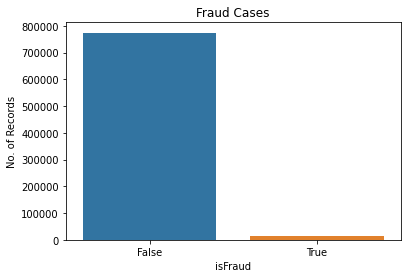

In [ ]:
# plotting graph
plt.figure()
sns.countplot(data=data, x='isFraud')
plt.xlabel('isFraud')
plt.ylabel('No. of Records')
#plt.yscale('log')
plt.title('Fraud Cases')

#counting the value
data['isFraud'].value_counts()

**Observation:** Number of fraudulent transactions are very low. This makes it is extremely had to model. Data Augmentation or techniques like SMOOTE might help.

Text(0.5, 1.0, 'Top 10 Accounts with the Most Fraud Transactions')

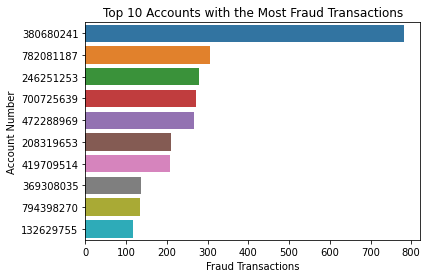

In [ ]:
from numpy.ma.core import count
fraud = data[data['isFraud'] ==True]
most_fraud_account = fraud['accountNumber'].value_counts().head(10)

plt.figure()

sns.barplot(y=list(range(10)), x=most_fraud_account.values, orient='h')
plt.yticks(ticks=list(range(10)), labels=most_fraud_account.index.tolist())
plt.ylabel('Account Number')
plt.xlabel('Fraud Transactions')
plt.title('Top 10 Accounts with the Most Fraud Transactions')

accountNumber  customerId  creditLimit  availableMoney  transactionDateTime  transactionAmount  merchantName              acqCountry  merchantCountryCode  posEntryMode  posConditionCode  merchantCategoryCode  currentExpDate  accountOpenDate  dateOfLastAddressChange  cardCVV  enteredCVV  cardLast4Digits  transactionType  echoBuffer  currentBalance  merchantCity  merchantState  merchantZip  cardPresent  posOnPremises  recurringAuthInd  expirationDateKeyInMatch  isFraud
100088067      100088067   50000        49734.57        2016-12-26T19:14:46  309.96             South Cafe                US          US                                 01                food                  11/2021         2014-01-09       2014-01-09               546      546         4615             PURCHASE                     265.43                                                    True                                          False                     True       1
696060213      696060213   15000        14452.14   

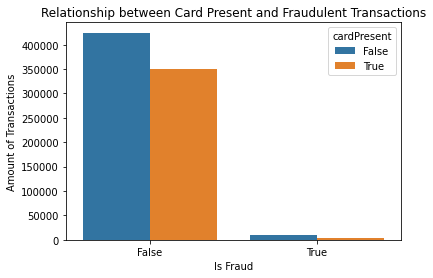

In [ ]:
sns.countplot(data=data, x='isFraud', hue='cardPresent')
plt.xlabel('Is Fraud')
plt.ylabel('Amount of Transactions')
plt.title('Relationship between Card Present and Fraudulent Transactions')

In [ ]:
temp = data[data['isFraud']==True]
temp['cardPresent'].value_counts

sum(fraud['accountNumber'].value_counts().head(20))

<bound method IndexOpsMixin.value_counts of 694       False
971       False
1072      False
1113      False
1321      False
          ...  
785680    False
785713     True
785888    False
786054    False
786112    False
Name: cardPresent, Length: 12417, dtype: bool>

**Observation:** There are very few fradulent transactions with card present 

# Summary


> 1. Total transactions - 786363, out of them fradulent transaction 12417. They account to 1.6%.
2. Out of 12417 there are 200 cases where entered CVV did not match with actual CVV 1.6% (Do they add much meaning and should we consider them?)
3. There are only 13 transactions with 'transaction type' as blank - not adding much value so we can remove it
4. Out of fradulent transactions expirationDateKeyInMatch is fasle for most of them except for a few. There are only 13 entires when expiration key did match.
5. There only 1000 transactions out 786363 where expiration key match is true - should we remove expiration key match??
6. Does customer ID have significane - can we ignore.



In [ ]:
# Stats for reference
# Tx  =  773946 - 12417
# CVV =   7015 -  203
# EKI =   1000 -  13
# ADD =   20169 - 116
# rev =   20303 - 337
# pur =  745193 - 11950
# CP  =  343306 - 3364

1. By ignoring transaction types other than purchase we only remove 5% of data. Its reasonable to model data based on transaction type. 
2. Attributes like CVV mismatch, expiration key match does not add much meaning, it is logical to assume that model performance depends on the these features. Will test this hypothesis.
3. Attributes like Account number, Customer ID, last 4 digits do not add much meaning to the modelling. So ignoring them.
4. Following attributes are relevant- creditLimit,	availableMoney,	transactionAmount, currentBalance, cardPresent.

In [ ]:
# Data Processing
data = data[data['transactionType'] == "PURCHASE"]
data.drop(["accountNumber", "customerId","posEntryMode","posConditionCode","transactionDateTime","acqCountry","cardCVV", "enteredCVV",	"cardLast4Digits", "expirationDateKeyInMatch", "merchantCountryCode","merchantName","merchantCategoryCode","currentExpDate","accountOpenDate","dateOfLastAddressChange","transactionType","merchantCity","merchantState","merchantZip","posOnPremises","recurringAuthInd","echoBuffer"], axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
data.head()

,creditLimit,availableMoney,transactionAmount,currentBalance,cardPresent,isFraud
0,5000,5000.0,98.55,0.0,False,False
1,5000,5000.0,74.51,0.0,True,False
2,5000,5000.0,7.47,0.0,False,False
3,5000,5000.0,7.47,0.0,False,False
4,5000,5000.0,71.18,0.0,True,False


In [ ]:
data["cardPresent"] = data['cardPresent'] * 1
data.head()

valid = data[data.isFraud == 0]
fraud = data[data.isFraud == 1]

#checking the count of new variables
print("Number of Records: {} and Number of Columns: {} for valid".format(valid.shape[0],valid.shape[1]))
print("Number of Records: {} and Number of Columns: {} for fraud".format(fraud.shape[0],fraud.shape[1]))

print("Statistical Data for Valid Transactions\n",valid.transactionAmount.describe(),"\n")
print("Statistical Data for Fraud Transactions\n",fraud.transactionAmount.describe())

Number of Records: 733243 and Number of Columns: 6 for valid
Number of Records: 11950 and Number of Columns: 6 for fraud
Statistical Data for Valid Transactions
 count    733243.000000
mean        139.210027
std         146.761288
min           0.000000
25%          36.670000
50%          90.630000
75%         193.340000
max        2011.540000
Name: transactionAmount, dtype: float64 

Statistical Data for Fraud Transactions
 count    11950.000000
mean       227.240809
std        188.748419
min          0.010000
25%         88.700000
50%        179.105000
75%        313.180000
max       1608.350000
Name: transactionAmount, dtype: float64


In [ ]:
# Data Imbalance is huge and needs to be fixed.

# Sampling Data

In [ ]:
# Simplest way of sampling is random sampling
valid_sample = valid.sample(len(fraud))

#concatinating two data frams (valid_sample and fruad) so we have equal number of records. # axis is 0 because we don't want to add data column wise, we want to add it row wise
new_df = pd.concat([valid_sample,fraud],axis = 0)

# we can confirm the data is random by looking at the index.
print(new_df.head(10))

print(new_df.tail(10))

new_df['isFraud'].value_counts()

        creditLimit  availableMoney  ...  cardPresent  isFraud
207371         7500         5020.42  ...            1    False
140211        50000        40376.16  ...            1    False
156522          250           82.43  ...            1    False
721191         2500         2080.82  ...            1    False
365056        15000         3947.87  ...            0    False
445357         7500         6258.31  ...            0    False
547060         1000          233.50  ...            1    False
448393          250           58.64  ...            0    False
434404        15000        14079.13  ...            0    False
206844         7500         4739.13  ...            1    False

[10 rows x 6 columns]
        creditLimit  availableMoney  ...  cardPresent  isFraud
785305        50000        12580.54  ...            0     True
785306        50000        12188.19  ...            0     True
785409        50000        40226.12  ...            0     True
785410        50000        40134

False    11950
True     11950
Name: isFraud, dtype: int64

In [ ]:
X = new_df.drop(columns='isFraud',axis = 1)
Y = new_df['isFraud']

#converting true false to 0 1
Y = Y*1  

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify= Y, random_state= 2  )
print(X.shape,Y_train.shape,X_test.shape)
X.info()

(23900, 5) (19120,) (4780, 5)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 23900 entries, 207371 to 786112
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   creditLimit        23900 non-null  int64  
 1   availableMoney     23900 non-null  float64
 2   transactionAmount  23900 non-null  float64
 3   currentBalance     23900 non-null  float64
 4   cardPresent        23900 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 1.1 MB


In [ ]:
model = LogisticRegression()
svm_model = SVC()
svm_model.fit(X_train, Y_train)
model.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
#checking accuracy againt the test data
X_test_prediction = model.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print("Accuracy of Logistic Regression :",testing_data_accuracy*100,"%")


Accuracy of Logistic Regression : 63.38912133891213 %


In [ ]:
X_train_prediction_svm = svm_model.predict(X_train)
training_data_accuracy_svm = accuracy_score(X_train_prediction_svm, Y_train)
print("Accuracy of SVM :",training_data_accuracy_svm*100,'%')

Accuracy of SVM : 56.9560669456067 %


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
classifier = SVC(kernel='linear')
classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
accuracy_score(Y_test, Y_pred)


[[1211 1179]
 [ 636 1754]]


0.6202928870292888

In [ ]:
#rfm = RandomForestClassifier(n_estimators=20, max_depth = 5, oob_score=True,n_jobs=-1,random_state=101, max_features=None, min_samples_leaf= 30)
rfm = RandomForestClassifier(n_estimators=15, max_depth = 5, min_samples_leaf= 50, random_state=101)

rfm.fit(X_train,Y_train)
Y_pred_rfm = rfm.predict(X_test)

print("Accuracy of Random Forest :",accuracy_score(Y_test, Y_pred_rfm)*100,'%')

Accuracy of Random Forest : 64.76987447698744 %


In [ ]:
from xgboost import XGBClassifier
XGBmodel = XGBClassifier(max_depth=5, n_estimators=500)
XGBmodel.fit(X_train, Y_train)
Y_pred_XGB = XGBmodel.predict(X_train)
print("Accuracy of XGB :",accuracy_score(Y_train, Y_pred_XGB)*100,'%')

Accuracy of XGB : 73.4623430962343 %


# Imbalance 

In [ ]:
#concatinating two data frams (valid and fruad) so we have equal number of records. # axis is 0 because we don't want to add data column wise, we want to add it row wise
new_df = pd.concat([valid,fraud],axis = 0)

# we can confirm the data is random by looking at the index.
print(new_df.head(10))

print(new_df.tail(10))

new_df['isFraud'].value_counts()

   creditLimit  availableMoney  ...  cardPresent  isFraud
0         5000         5000.00  ...            0    False
1         5000         5000.00  ...            1    False
2         5000         5000.00  ...            0    False
3         5000         5000.00  ...            0    False
4         5000         5000.00  ...            1    False
5         5000         5000.00  ...            1    False
6         5000         5000.00  ...            1    False
7         5000         5000.00  ...            1    False
8         5000         4990.63  ...            1    False
9         5000         5000.00  ...            1    False

[10 rows x 6 columns]
        creditLimit  availableMoney  ...  cardPresent  isFraud
785305        50000        12580.54  ...            0     True
785306        50000        12188.19  ...            0     True
785409        50000        40226.12  ...            0     True
785410        50000        40134.91  ...            0     True
785482        50000     

False    733243
True      11950
Name: isFraud, dtype: int64

In [ ]:
X = new_df.drop(columns='isFraud',axis = 1)
Y = new_df['isFraud']

#converting true false to 0 1
Y = Y*1  

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify= Y, random_state= 2  )
print(X.shape,Y_train.shape,X_test.shape)
X.info()

(745193, 5) (596154,) (149039, 5)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 745193 entries, 0 to 786112
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   creditLimit        745193 non-null  int64  
 1   availableMoney     745193 non-null  float64
 2   transactionAmount  745193 non-null  float64
 3   currentBalance     745193 non-null  float64
 4   cardPresent        745193 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 34.1 MB


In [ ]:
rfm = RandomForestClassifier(n_estimators=15, max_depth = 5, min_samples_leaf= 50, random_state=101)

rfm.fit(X_train,Y_train)
Y_pred_rfm = rfm.predict(X_test)

print("Accuracy of Random Forest :",accuracy_score(Y_test, Y_pred_rfm)*100,'%')
# This high accuracy may be accounted to biased data

Accuracy of Random Forest : 98.3963928904515 %


In [ ]:
cm = confusion_matrix(Y_test, Y_pred_rfm)
print(cm)
accuracy_score(Y_test, Y_pred)

In [ ]:
from imblearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours

##No Imbalance Handling
#Define model
model_ori=AdaBoostClassifier()
#Define evaluation procedure (here we use Repeated Stratified K-Fold CV)
cv_ori=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
#Evaluate model
scoring=['accuracy','precision_macro','recall_macro']
scores_ori = cross_validate(model_ori, X, Y, scoring=scoring, cv=cv_ori, n_jobs=-1)

# summarize performance
print('Mean Accuracy: %.4f' % np.mean(scores_ori['test_accuracy']))
print('Mean Precision: %.4f' % np.mean(scores_ori['test_precision_macro']))
print('Mean Recall: %.4f' % np.mean(scores_ori['test_recall_macro']))

In [ ]:
##Using SMOTE-ENN to balance the data
#Define model
model=AdaBoostClassifier()
#Define SMOTE-ENN
resample=SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='all'))
#Define pipeline
pipeline=Pipeline(steps=[('r', resample), ('m', model)])
#Define evaluation procedure (here we use Repeated Stratified K-Fold CV)
cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
#Evaluate model
scoring=['accuracy','precision_macro','recall_macro']
scores = cross_validate(pipeline, X_train, Y_train, scoring=scoring, cv=cv, n_jobs=-1)

# summarize performance
print('Mean Accuracy: %.4f' % np.mean(scores['test_accuracy']))
print('Mean Precision: %.4f' % np.mean(scores['test_precision_macro']))
print('Mean Recall: %.4f' % np.mean(scores['test_recall_macro']))

Mean Accuracy: 0.6518
Mean Precision: 0.5099
Mean Recall: 0.6435


In [ ]:
scores

{'fit_time': array([91.98044038, 92.13250327, 94.98961091, 96.56101394, 93.76080132,
        92.51380515, 92.76805925, 93.23924589, 92.82825565, 91.63023806,
        94.3244803 , 94.30865407, 93.27880883, 86.95049405, 87.89850163,
        92.50400186, 90.06577373, 92.7004416 , 89.31649637, 92.87411404,
        91.30667257, 93.48441315, 89.07447529, 95.93932414, 89.72042823,
        93.49241352, 90.81186533, 90.98177242, 88.15246105, 83.85108519]),
 'score_time': array([0.73067474, 0.75266147, 0.72205281, 0.69658828, 0.72252584,
        0.76399398, 0.68511176, 0.70965004, 0.73720837, 0.73067451,
        0.71921968, 0.7326436 , 0.67925143, 0.70558691, 0.71479321,
        0.70131278, 0.70756316, 0.67806721, 0.70637512, 0.68277383,
        0.67984939, 0.69604492, 0.70379806, 0.68897271, 0.73664331,
        0.69728851, 0.71197391, 0.6891377 , 0.69017673, 0.50395441]),
 'test_accuracy': array([0.65574678, 0.65042941, 0.65532743, 0.6507649 , 0.64768934,
        0.64926612, 0.6516313 , 0.64710

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, Y_train)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_res)
X_test = sc.transform(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
rfm = RandomForestClassifier(n_estimators=25, max_depth = 5, min_samples_leaf= 50, random_state=101)

rfm.fit(X_res, y_res)
Y_pred_rfm = rfm.predict(X_test)

print("Accuracy of Random Forest :",accuracy_score(Y_test, Y_pred_rfm)*100,'%')

Accuracy of Random Forest : 62.395748763746404 %


Can we use more attributes??
Like posEntryMode and posConditionCode

# Things I can do if given more time:

1. Programmatically download the data instead of using git to clone the repository and unzipping it.
2. In Duplicate transactions - could have refined my criteria better to identify reversals and multi-swipes.
3. Could have experimented on more attributes that may help identify fraud. Analyze the top 20 fraudlent transactions to get some pattern/behaviour.
4. Could have tried some more techniques to identify fraud. I have taken a course on anomaly detection where there is very huge data imbalance and interesting techniques to detect anomalies. Given my packed schedule could not try them out on this dataset :(

This project is not my best work but given the limited time (around 8hrs) this is best I could do. 